In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_columns = ['Date/Time',
              'BLOCCO1:ZONA1:Zone Operative Temperature [C](TimeStep:ON)',
              'BLOCCO1:ZONA1:Zone Air Relative Humidity [%](TimeStep:ON)',
              'BLOCCO1:ZONA1:Zone Ventilation Air Change Rate [ach](TimeStep)',
              'BLOCCO1:ZONA1:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)',              
              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
              'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)',
              'Environment:Site Wind Speed [m/s](TimeStep)',
              'Environment:Site Wind Direction [deg](TimeStep)',
              'DistrictHeating:Facility [J](TimeStep)',
              'DistrictCooling:Facility [J](TimeStep)']

#csv_columns = ['Date/Time',
#              'BLOCK1:ZONE1:Zone Mean Air Temperature [C](TimeStep:ON)',
#              'BLOCK1:ZONE1:Zone Air Relative Humidity [%](TimeStep:ON)',
#              'BLOCK1:ZONE1:Zone Ventilation Air Change Rate [ach](TimeStep)',
#              'BLOCK1:ZONE1:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)',
#              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
#              'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)',
#              'Environment:Site Wind Speed [m/s](TimeStep)',
#              'Environment:Site Wind Direction [deg](TimeStep)',
#              'DistrictHeating:Facility [J](TimeStep)',
#              'DistrictCooling:Facility [J](TimeStep)']



In [3]:
idf_data =pd.read_csv('/home/ict4bd/Residential_oslo/outputDir2016/eplusout.csv',usecols=csv_columns)

In [4]:
df_columns = {'Date/Time':'Date_Time',
              'BLOCCO1:ZONA1:Zone Operative Temperature [C](TimeStep:ON)':'t_in',
              'BLOCCO1:ZONA1:Zone Air Relative Humidity [%](TimeStep:ON)':'humidity',
              'BLOCCO1:ZONA1:Zone Ventilation Air Change Rate [ach](TimeStep)':'ACH',
              'BLOCCO1:ZONA1:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)':'solar_rad',             
              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)':'t_out',
              'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)':'pressure',
              'Environment:Site Wind Speed [m/s](TimeStep)':'wind_speed',
              'Environment:Site Wind Direction [deg](TimeStep)':'wind_dir',
              'DistrictHeating:Facility [J](TimeStep)':'power_heating',
              'DistrictCooling:Facility [J](TimeStep)':'power_cooling'}


#df_columns = {'Date/Time':'Date_Time',
#              'BLOCK1:ZONE1:Zone Mean Air Temperature [C](TimeStep:ON)':'t_in',
#              'BLOCK1:ZONE1:Zone Air Relative Humidity [%](TimeStep:ON)':'humidity',
#              'BLOCK1:ZONE1:Zone Ventilation Air Change Rate [ach](TimeStep)':'ACH',
#              'BLOCK1:ZONE1:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep)':'solar_rad',           
#              'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)':'t_out',
#              'Environment:Site Outdoor Air Barometric Pressure [Pa](TimeStep)':'pressure',
#              'Environment:Site Wind Speed [m/s](TimeStep)':'wind_speed',
#              'Environment:Site Wind Direction [deg](TimeStep)':'wind_dir',
#              'DistrictHeating:Facility [J](TimeStep)':'power_heating',
#              'DistrictCooling:Facility [J](TimeStep)':'power_cooling'}


In [5]:
idf_data = idf_data.rename(columns =df_columns)

In [6]:
#idf_data['t_in'] = idf_data[['t_in_bedroom','t_in_diningroom','t_in_bathroom']].mean(axis=1)
#idf_data.drop(['t_in_bathroom','t_in_bedroom','t_in_diningroom'], axis = 1)

In [7]:
#idf_data['temp_diff'] =idf_data['t_in'] - idf_data['t_out']

In [8]:
idf_data['Date_Time'] = '2016/' + idf_data['Date_Time'].str.strip()
idf_data['Date_Time'] = idf_data['Date_Time'].str.replace('24:00:00','00:00:00')

In [9]:
idf_data['power_heating'] /= 0.9e6 
idf_data['power_cooling'] /= 0.9e6

In [10]:
idf_data['power_heating'] = idf_data['power_heating'].apply(lambda x: round(x, 2))
idf_data['power_cooling'] = idf_data['power_cooling'].apply(lambda x: round(x, 2))
idf_data['t_in'] = idf_data['t_in'].apply(lambda x: round(x, 2))
idf_data['humidity'] = idf_data['humidity'].apply(lambda x: round(x, 2))
idf_data['ACH'] = idf_data['ACH'].apply(lambda x: round(x, 2))
idf_data['t_out'] = idf_data['t_out'].apply(lambda x: round(x, 2))
idf_data['solar_rad'] = idf_data['solar_rad'].apply(lambda x: round(x, 2))
idf_data['pressure'] = idf_data['pressure'].apply(lambda x: round(x, 2))
idf_data['wind_speed'] = idf_data['wind_speed'].apply(lambda x: round(x, 2))
idf_data['wind_dir'] = idf_data['wind_dir'].apply(lambda x: round(x, 2))

In [11]:
area_1 = 4.3647
area_2 = 14.665
area_3 = 22.7323
area_tot = area_1 + area_2 + area_3

In [12]:
idf_data['total_plants'] = idf_data['power_heating']+ idf_data['power_cooling']
idf_data['power_h1'] = idf_data['power_heating']*area_1/area_tot
#idf_data['power_h2'] = idf_data['power_heating']*area_2/area_tot
#idf_data['power_h3'] = idf_data['power_heating']*area_3/area_tot
idf_data['power_c1'] = idf_data['power_cooling']*area_1/area_tot
#idf_data['power_c2'] = idf_data['power_cooling']*area_2/area_tot
#idf_data['power_c3'] = idf_data['power_cooling']*area_3/area_tot

In [13]:
idf_data = idf_data[['Date_Time','t_in','t_out','power_h1','power_c1','solar_rad']]

In [14]:
idf_data.to_csv(path_or_buf='/home/ict4bd/Residential_oslo/2016_bath.csv',index=False)

In [15]:
idf_data

,Date_Time,t_in,t_out,power_h1,power_c1,solar_rad
0,2016/01/01 00:15:00,19.62,1.87,0.077340,0.0,0.0
1,2016/01/01 00:30:00,19.61,1.80,0.080476,0.0,0.0
2,2016/01/01 00:45:00,19.59,1.74,0.082566,0.0,0.0
3,2016/01/01 01:00:00,19.58,1.68,0.084656,0.0,0.0
4,2016/01/01 01:15:00,19.57,1.71,0.085701,0.0,0.0
...,...,...,...,...,...,...
35035,2016/12/31 23:00:00,19.31,2.53,0.095107,0.0,0.0
35036,2016/12/31 23:15:00,19.30,2.53,0.116010,0.0,0.0
35037,2016/12/31 23:30:00,19.30,2.53,0.117055,0.0,0.0
35038,2016/12/31 23:45:00,19.29,2.53,0.117055,0.0,0.0


In [16]:
#idf_data_hour = pd.read_csv('/home/ict4bd/Residential1/simulation_Data_2019_rad.csv', parse_dates=[0,], index_col='Date_Time')
#idf_data_hour = idf_data_hour.resample('H').interpolate()
#idf_data_hour.to_csv(path_or_buf='/home/ict4bd/Residential1/simulation_Data_2019_rad.csv')

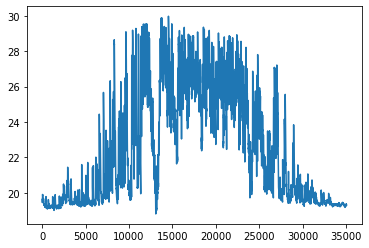

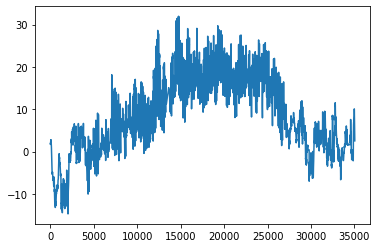

In [17]:
#idf_data_hour = idf_data_hour.resample('D').interpolate()
plt.plot(idf_data['t_in'])
plt.show()
plt.plot(idf_data['t_out'])
plt.show()